In [2]:
! pip install librosa

     ---------------------------------------- 1.0/1.0 MB 5.3 MB/s eta 0:00:00
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
     --------------------------------------- 14.0/14.0 MB 43.7 MB/s eta 0:00:00
   --------------------------------------- 253.7/253.7 kB 15.2 MB/s eta 0:00:00
Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
   ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
   --------------------------------------- 184.8/184.8 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
bokeh 2.4.2 requires tornado>=5.1, but you have tornado 4.5.3 which is incompatible.
torchvision 0.14.0 requires torch==1.13.0, but you have torch 2.0.1 which is incompatible.
ultralytics 8.0.211 requires numpy>=1.22.2, but you have numpy 1.21.6 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
from IPython.display import display, Audio
import librosa
import librosa.display
import pandas as pd
import os

### Visualizing an audio file

In [2]:
audio_file = './data/recordings/train/1249120_44142156_100535941.wav'

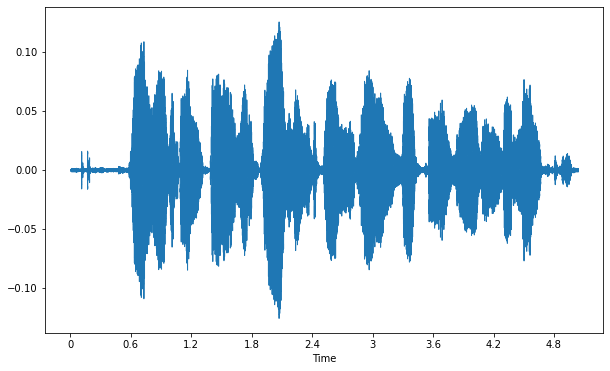

In [4]:
plt.figure(figsize=(10,6))
audio_data, rate = librosa.load(audio_file)
librosa.display.waveshow(audio_data, sr=rate)
ipd.Audio(audio_file)

### Visualizing audio files with respect to the intent

In [7]:
recordings_overview = pd.read_csv('./data/overview-of-recordings.csv')

In [8]:
recordings_overview.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [15]:
intent_filename_df = recordings_overview[['file_name', 'prompt']].rename(columns={'prompt':'intent', 'file_name':'filename'})

In [16]:
intent_filename_df.head()

,filename,intent
0,1249120_43453425_58166571.wav,Emotional pain
1,1249120_43719934_43347848.wav,Hair falling out
2,1249120_43719934_53187202.wav,Heart hurts
3,1249120_31349958_55816195.wav,Infected wound
4,1249120_43719934_82524191.wav,Infected wound


Acne


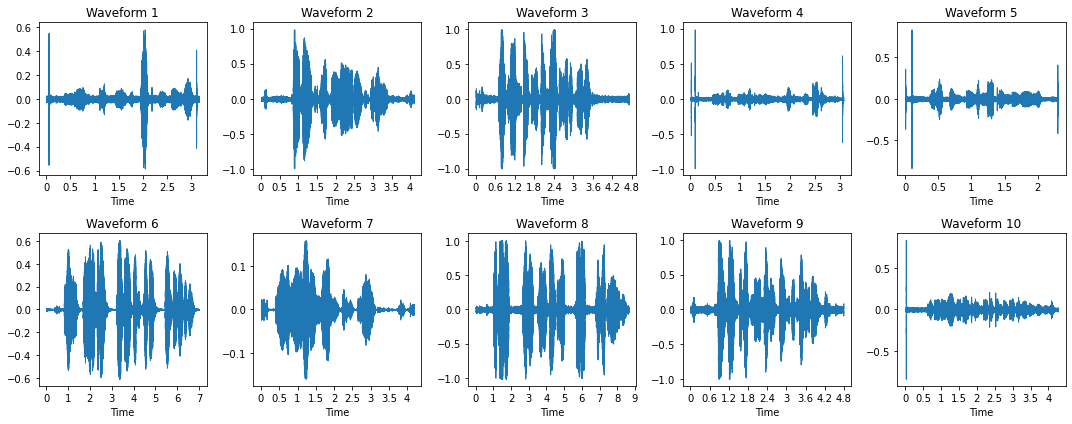

Back pain


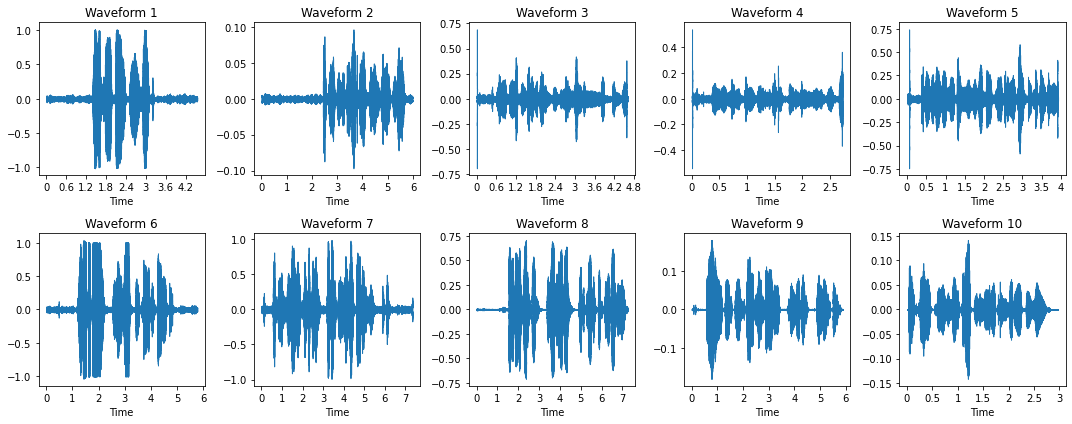

Blurry vision


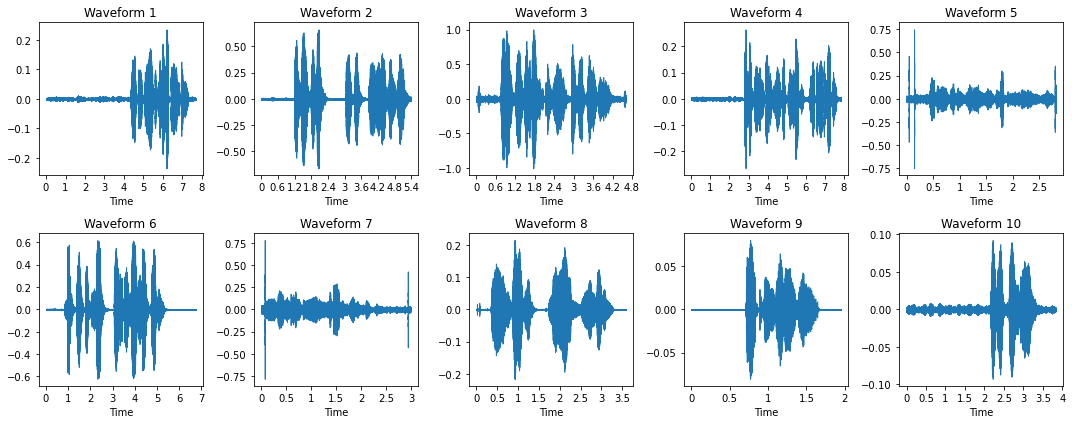

Body feels weak


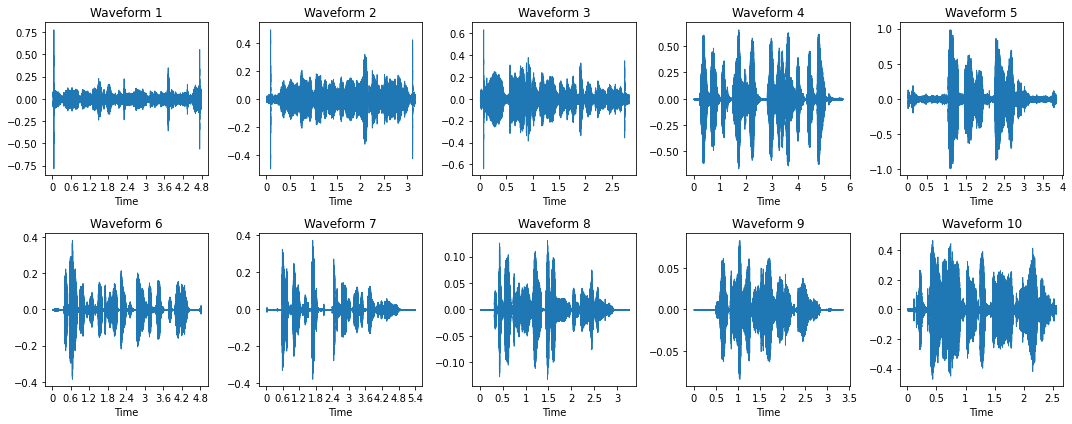

Cough


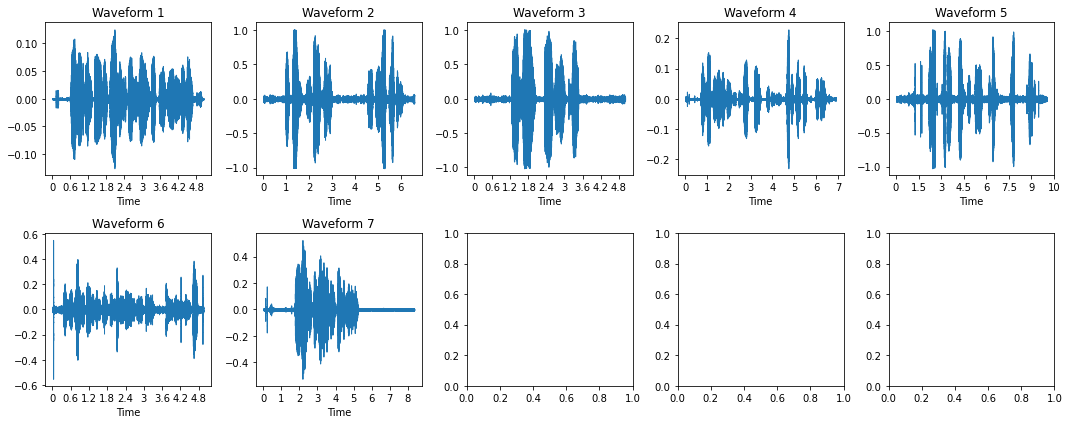

Ear ache


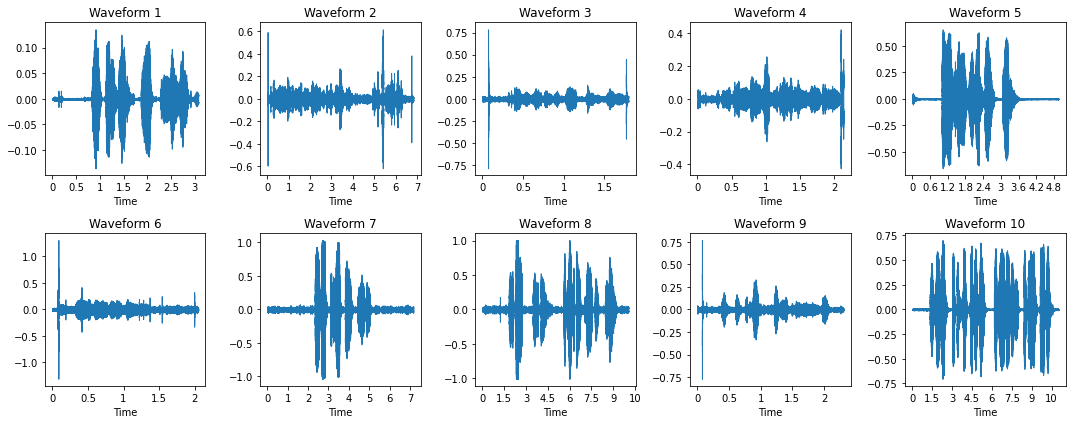

Emotional pain


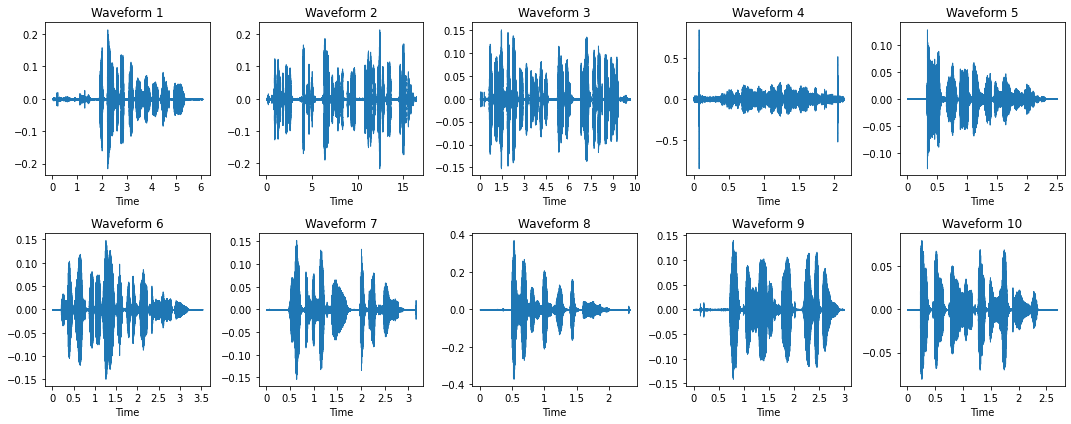

Feeling cold


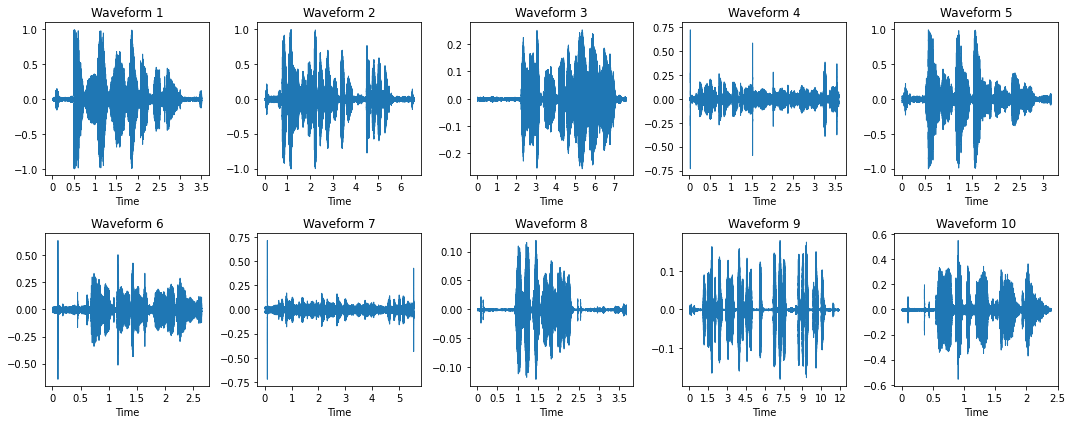

Feeling dizzy


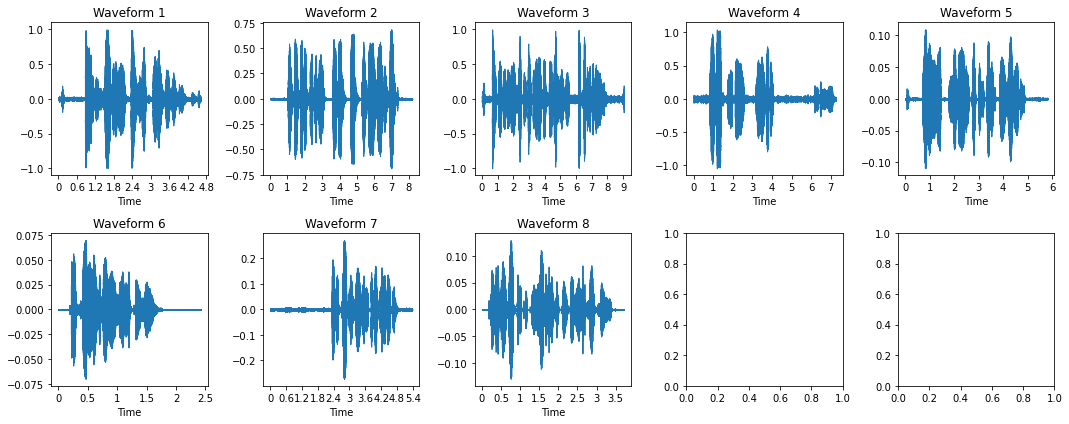

Foot ache


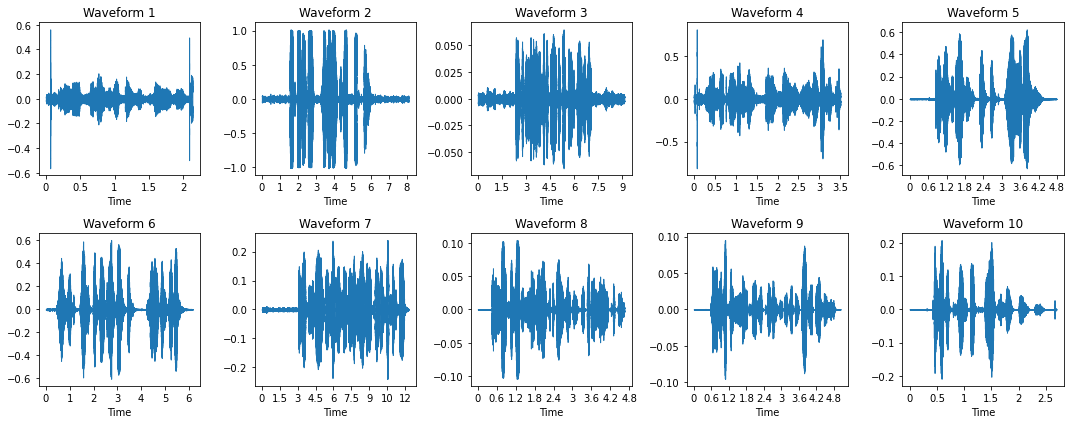

Hair falling out


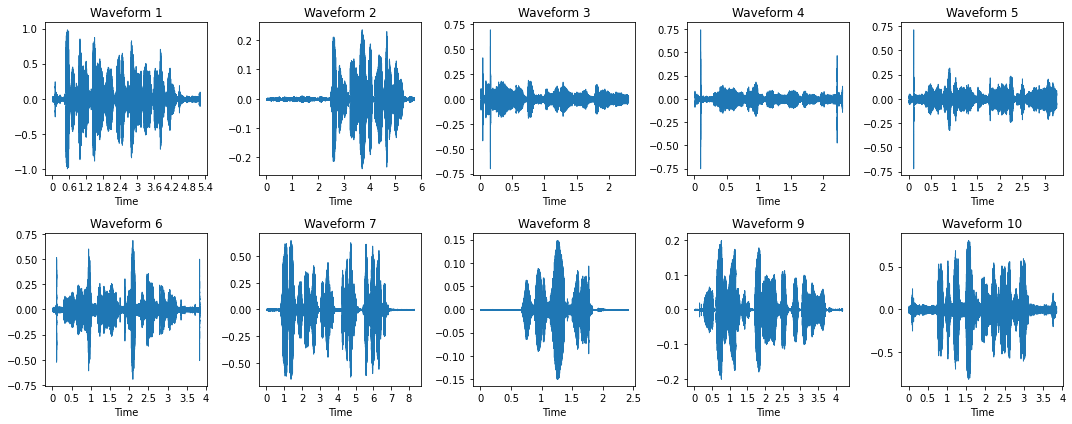

Hard to breath


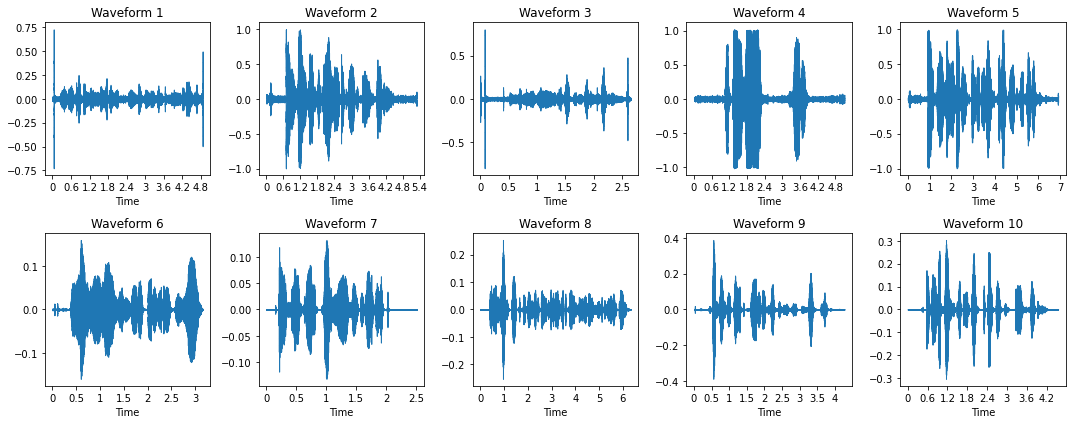

Head ache


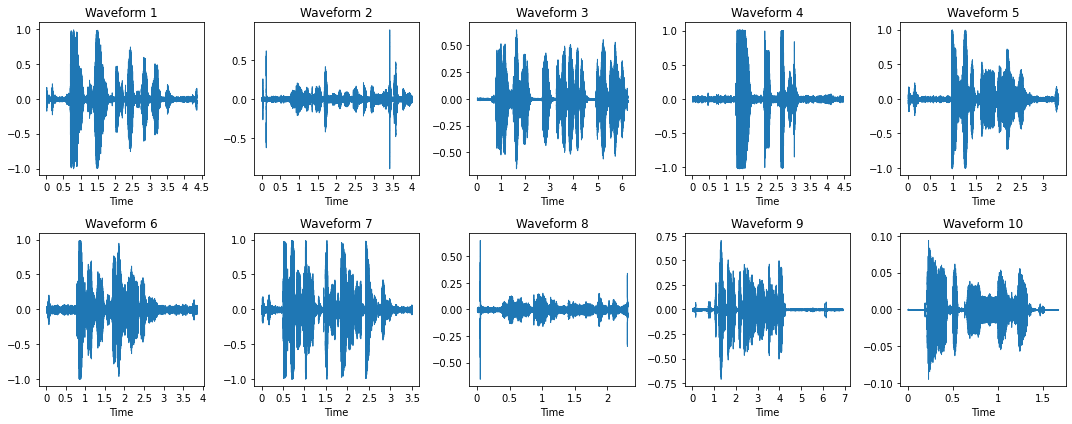

Heart hurts


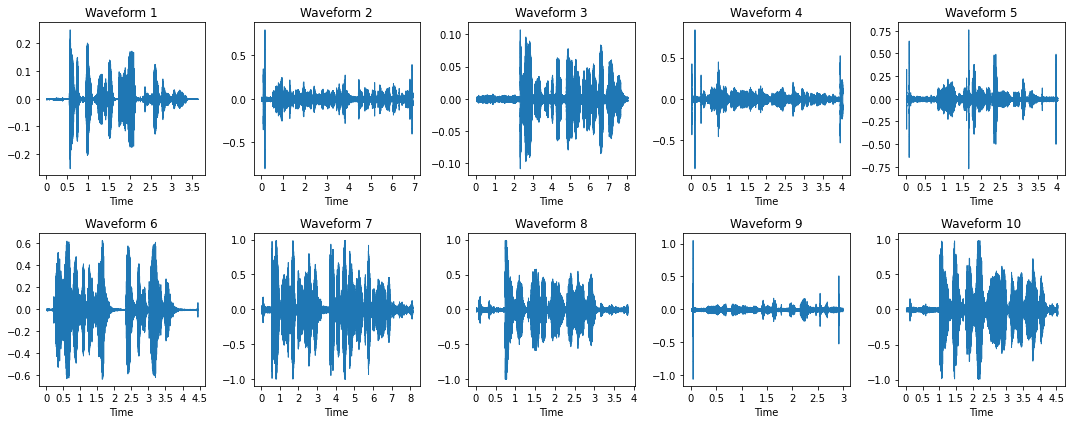

Infected wound


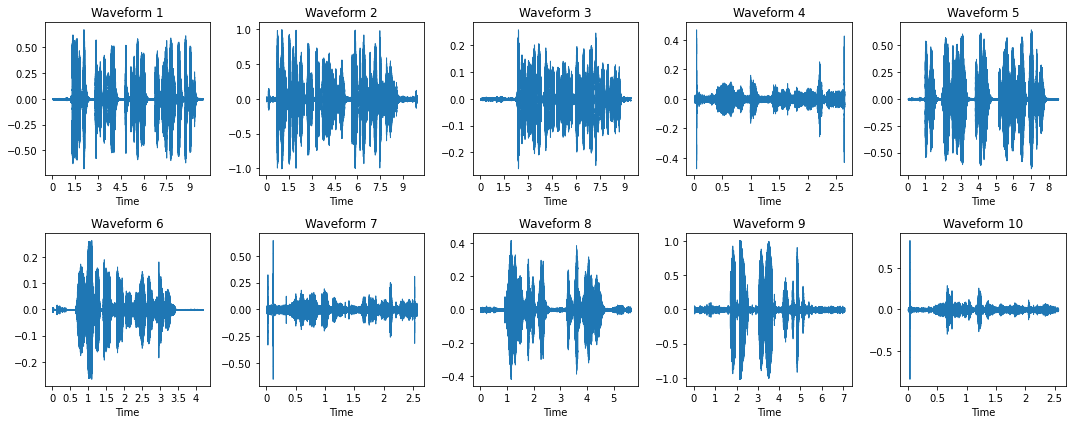

Injury from sports


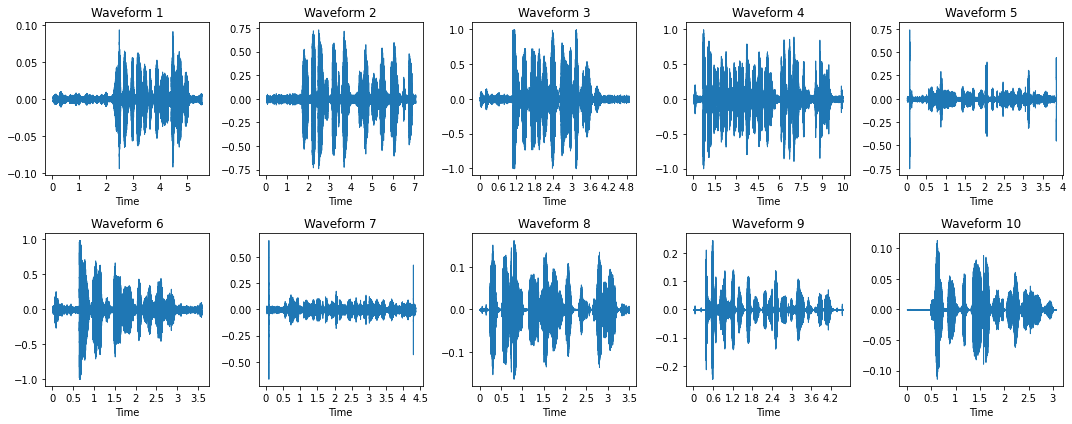

Internal pain


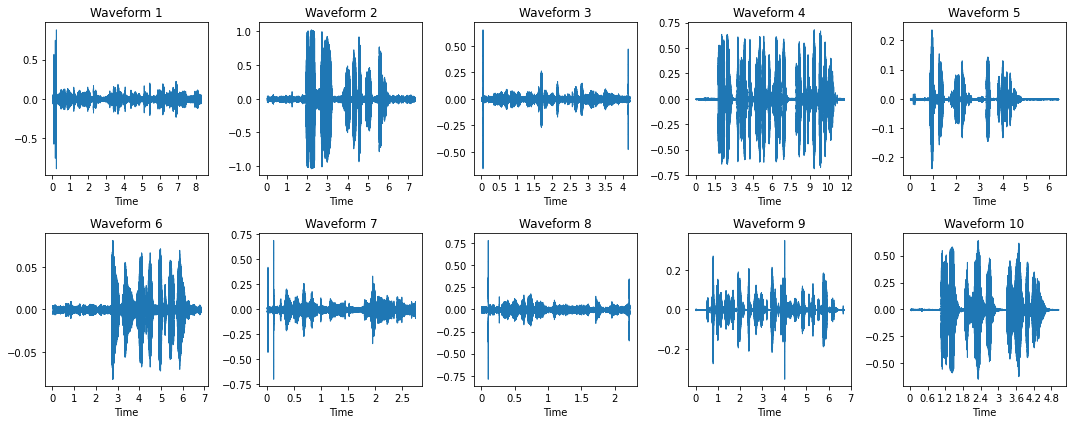

Joint pain


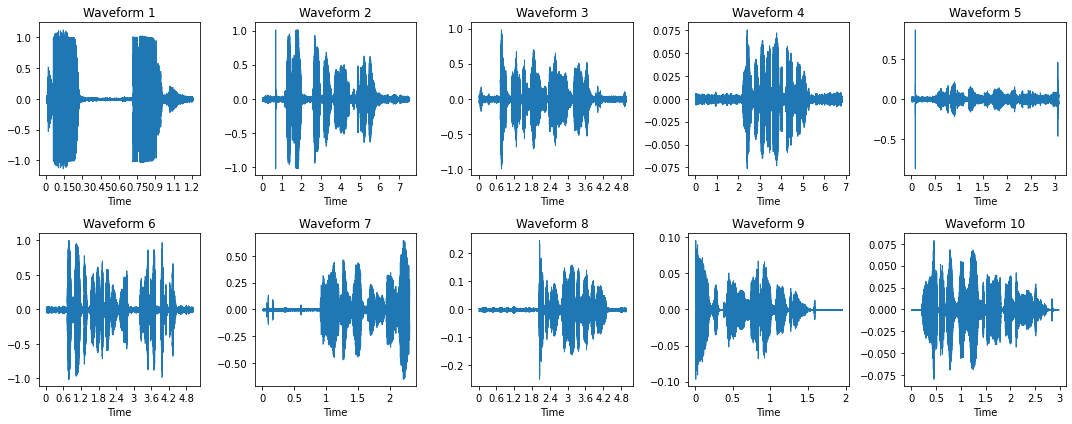

Knee pain


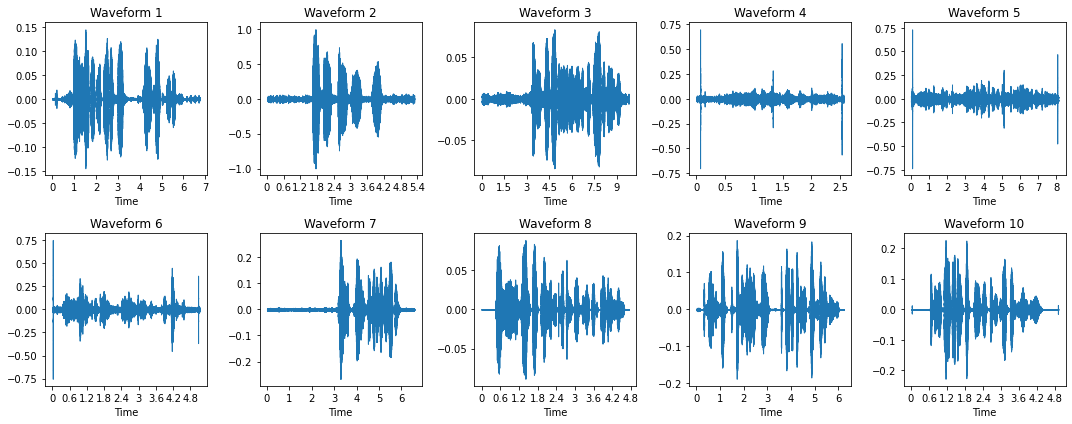

Muscle pain


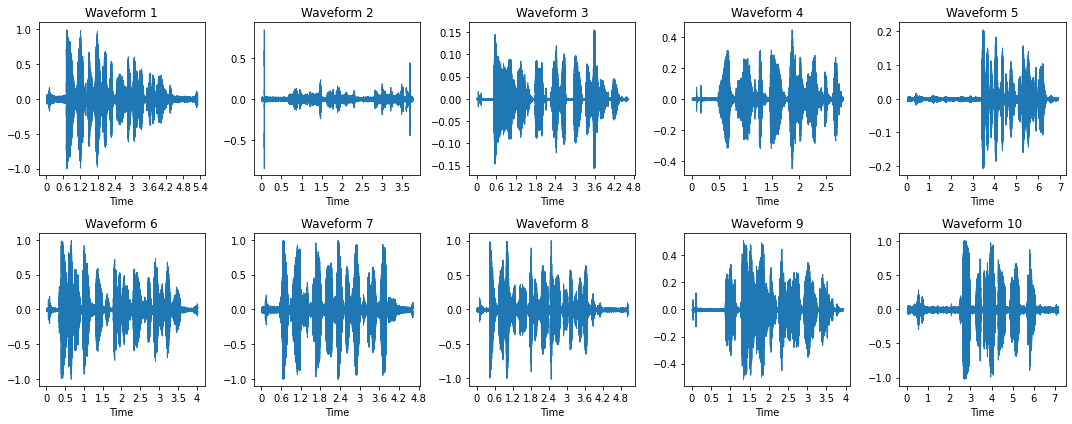

Neck pain


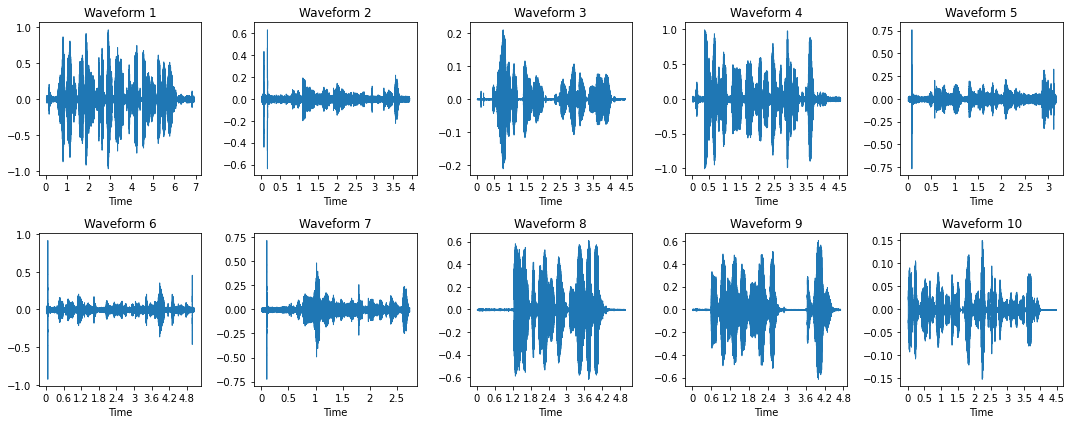

Open wound


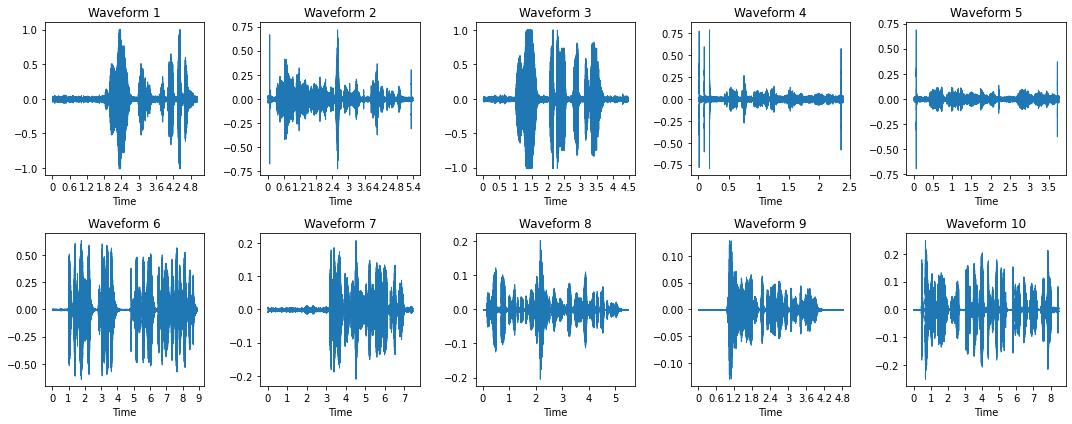

Shoulder pain


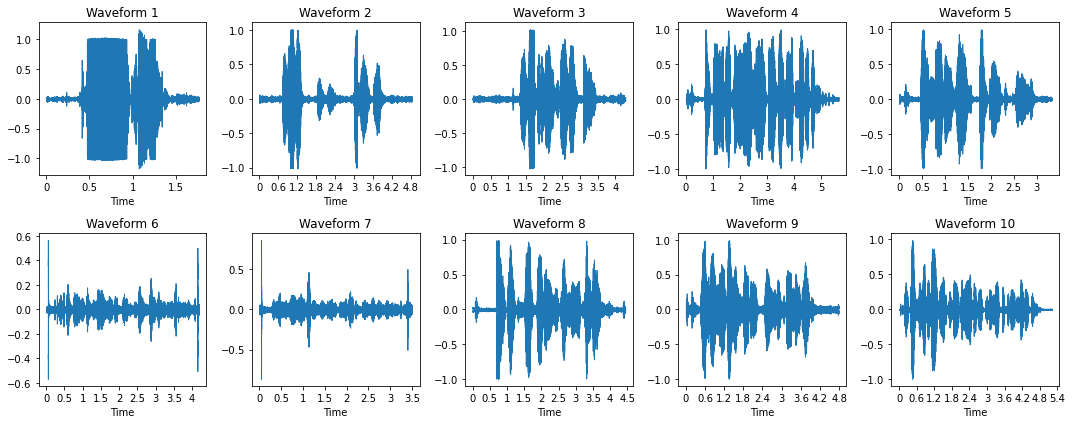

Skin issue


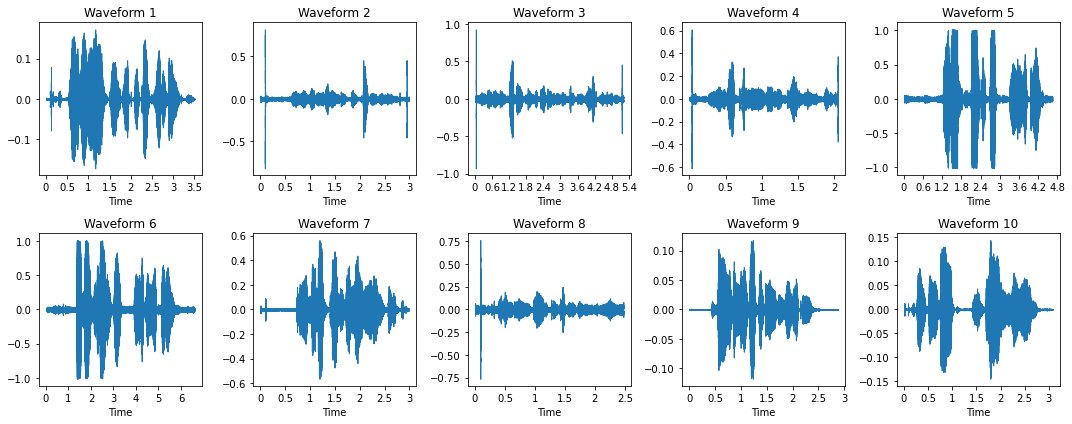

Stomach ache


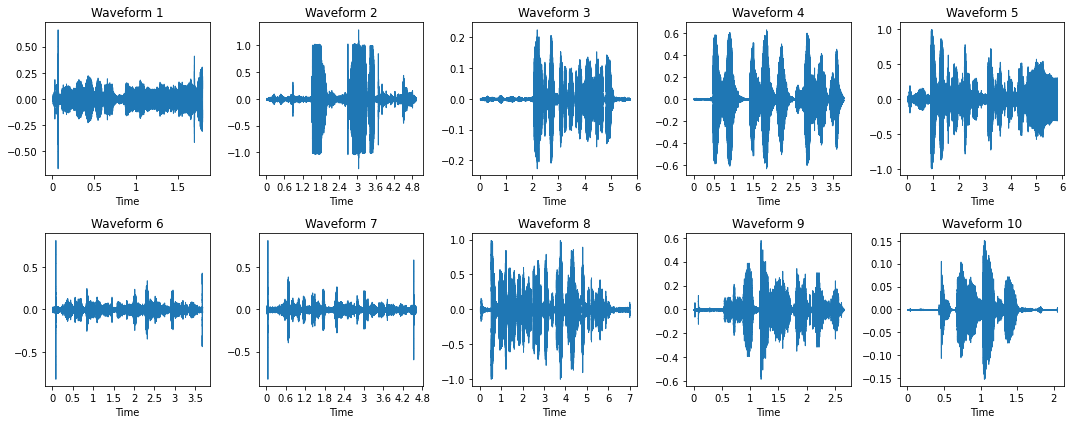

In [42]:
train_path = './data/recordings/train/'

for intent, group  in intent_filename_df.groupby('intent'):
    
    print(intent)
    audio_files_all = list(group['filename'])
    audio_files_train = []
    
    for audio_file in audio_files_all:
        file_path = os.path.join(train_path, audio_file)
        if os.path.exists(file_path):
            audio_files_train.append(file_path)
        if len(audio_files_train) == 10:
            break
        
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))

    for i in range(2):
        for j in range(5):
            index = i * 5 + j
            if index < len(audio_files_train):
                audio_file = audio_files_train[index]

                ax_wave = axs[i, j]
                audio_data, rate = librosa.load(audio_file)
                librosa.display.waveshow(audio_data, sr=rate, ax=ax_wave)
                ax_wave.set_title(f'Waveform {index + 1}')

    
    plt.tight_layout()
    plt.show()